In [9]:
import numpy as np
import pandas as pd
df = pd.read_csv("ICU_Challenge_Dataset.csv")

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Height,Weight,CCU,CSRU,...,Platelets_last,TroponinI_last,TroponinT_last,WBC_last,Weight_last,pH_last,MechVentStartTime,MechVentDuration,MechVentLast8Hour,UrineOutputSum
0,132539,6,1,0,54.0,0.0,NaN,NaN,0,0,...,185.0,NaN,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,1.0,175.3,76.0,0,1,...,135.0,NaN,NaN,13.3,81.6,7.37,71.0,360.0,0.0,5.0
2,132541,21,11,0,44.0,0.0,NaN,56.7,0,0,...,113.0,NaN,NaN,6.2,56.7,7.47,617.0,2160.0,1.0,14.0
3,132543,7,1,0,68.0,1.0,180.3,84.6,0,0,...,284.0,NaN,NaN,7.9,84.6,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0.0,NaN,NaN,0,0,...,97.0,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,NaN,80.0,0,0,...,221.0,NaN,NaN,11.5,NaN,7.46,238.0,2440.0,1.0,17.0
5996,151383,13,2,0,90.0,0.0,157.5,72.0,1,0,...,305.0,NaN,NaN,12.1,68.5,NaN,NaN,NaN,NaN,NaN
5997,149623,12,9,0,72.0,0.0,NaN,185.0,1,0,...,167.0,NaN,0.02,12.7,NaN,7.39,188.0,1200.0,0.0,10.0
5998,145366,18,11,1,52.0,1.0,182.9,95.9,0,0,...,28.0,NaN,NaN,5.8,96.2,7.36,100.0,2760.0,1.0,27.0


In [10]:
df.isnull().sum() # I check the missing values

recordid                0
SAPS-I                  0
SOFA                    0
In-hospital_death       0
Age                     0
                     ... 
pH_last              1478
MechVentStartTime    2256
MechVentDuration     2256
MechVentLast8Hour    2256
UrineOutputSum       2256
Length: 121, dtype: int64

# Fill NaN 

In [11]:
#se la colonna ha più di # (1000) NaN allora droppo la colonna
for i in df.columns:
            if (float(df[i].isnull().sum())) > 1000:
                df = df.drop(i, axis = 1)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Weight,CCU,CSRU,SICU,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
0,132539,6,1,0,54.0,0.0,NaN,0,0,1,...,11.2,8.0,0.7,28.0,30.3,4.0,1.9,136.0,185.0,9.4
1,132540,16,8,0,76.0,1.0,76.0,0,1,0,...,7.4,21.0,1.3,24.0,29.4,3.5,1.9,135.0,135.0,13.3
2,132541,21,11,0,44.0,0.0,56.7,0,0,0,...,4.2,3.0,0.3,25.0,29.4,3.7,1.7,138.0,113.0,6.2
3,132543,7,1,0,68.0,1.0,84.6,0,0,0,...,11.5,10.0,0.7,28.0,36.3,3.8,1.9,137.0,284.0,7.9
4,132545,17,2,0,88.0,0.0,NaN,0,0,0,...,3.8,25.0,1.0,20.0,30.9,4.1,1.6,139.0,97.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,80.0,0,0,1,...,14.5,9.0,0.6,23.0,26.8,3.6,2.0,140.0,221.0,11.5
5996,151383,13,2,0,90.0,0.0,72.0,1,0,0,...,12.4,23.0,0.7,30.0,32.0,4.0,2.0,129.0,305.0,12.1
5997,149623,12,9,0,72.0,0.0,185.0,1,0,0,...,9.6,67.0,2.8,37.0,32.0,3.4,1.7,144.0,167.0,12.7
5998,145366,18,11,1,52.0,1.0,95.9,0,0,0,...,3.1,25.0,1.0,20.0,24.7,4.9,2.1,134.0,28.0,5.8


In [12]:
df_filled = df.fillna(df.mean())
df = df_filled
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Weight,CCU,CSRU,SICU,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
0,132539,6,1,0,54.0,0.0,81.332485,0,0,1,...,11.2,8.0,0.7,28.0,30.3,4.0,1.9,136.0,185.0,9.4
1,132540,16,8,0,76.0,1.0,76.000000,0,1,0,...,7.4,21.0,1.3,24.0,29.4,3.5,1.9,135.0,135.0,13.3
2,132541,21,11,0,44.0,0.0,56.700000,0,0,0,...,4.2,3.0,0.3,25.0,29.4,3.7,1.7,138.0,113.0,6.2
3,132543,7,1,0,68.0,1.0,84.600000,0,0,0,...,11.5,10.0,0.7,28.0,36.3,3.8,1.9,137.0,284.0,7.9
4,132545,17,2,0,88.0,0.0,81.332485,0,0,0,...,3.8,25.0,1.0,20.0,30.9,4.1,1.6,139.0,97.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,1.0,80.000000,0,0,1,...,14.5,9.0,0.6,23.0,26.8,3.6,2.0,140.0,221.0,11.5
5996,151383,13,2,0,90.0,0.0,72.000000,1,0,0,...,12.4,23.0,0.7,30.0,32.0,4.0,2.0,129.0,305.0,12.1
5997,149623,12,9,0,72.0,0.0,185.000000,1,0,0,...,9.6,67.0,2.8,37.0,32.0,3.4,1.7,144.0,167.0,12.7
5998,145366,18,11,1,52.0,1.0,95.900000,0,0,0,...,3.1,25.0,1.0,20.0,24.7,4.9,2.1,134.0,28.0,5.8


In [13]:
df.isnull().sum() # I check the missing values

recordid             0
SAPS-I               0
SOFA                 0
In-hospital_death    0
Age                  0
                    ..
K_last               0
Mg_last              0
Na_last              0
Platelets_last       0
WBC_last             0
Length: 63, dtype: int64

# Remove Outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1579FB940>,
      dtype=object)

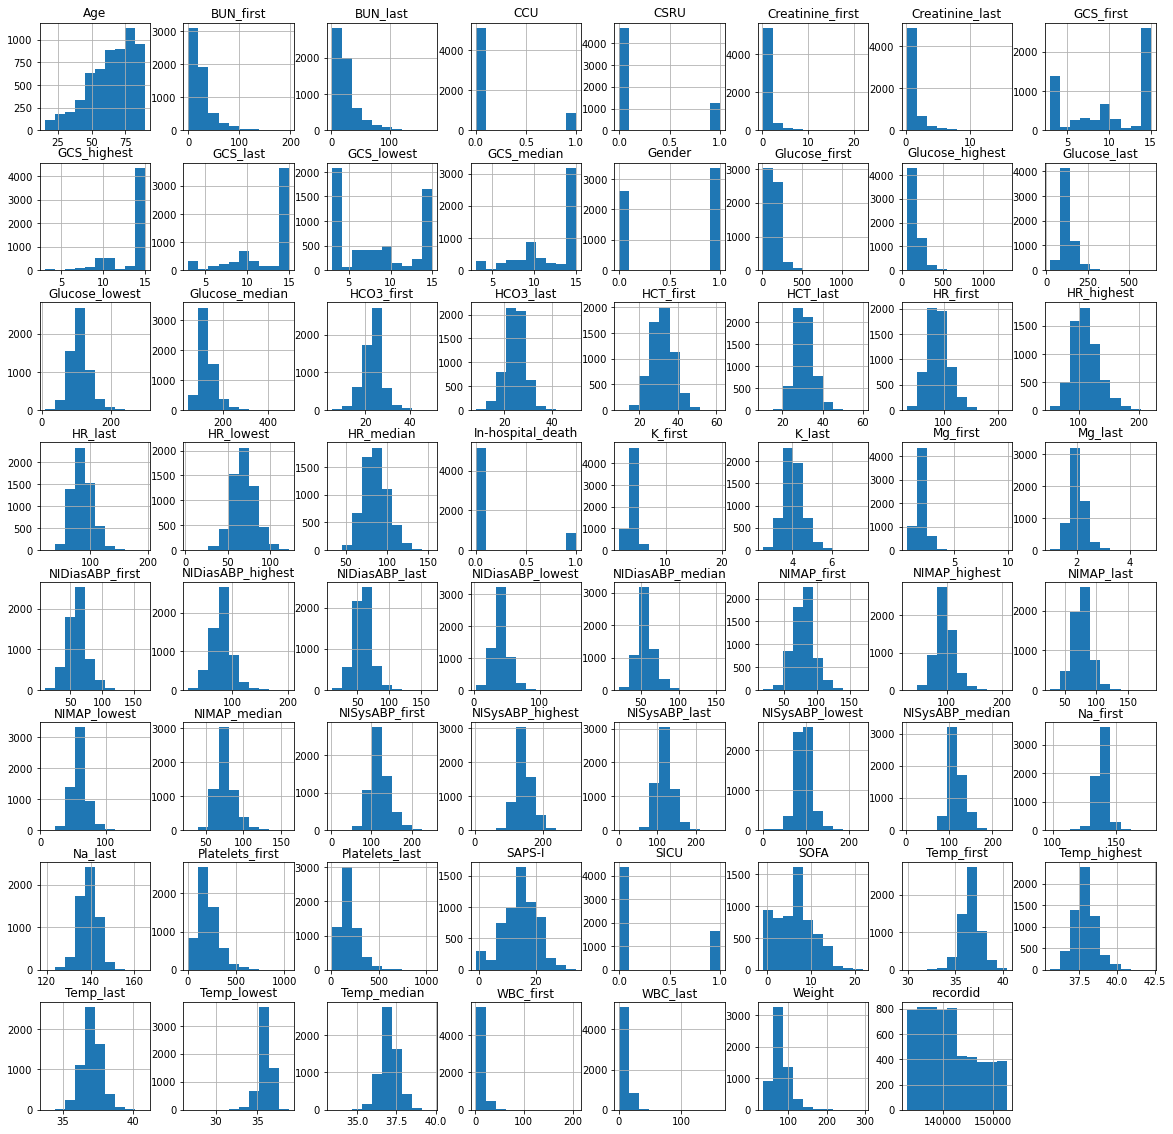

In [7]:
#I check the histograms before removing outliers
df.hist(figsize = (20,20))

In [14]:
for i in df.columns:
    if (df.loc != 'Gender' and df.loc!= 'CCU' and df.loc!= 'CSRU' and df.loc != 'SICU' and df.loc != 'In-hospital_death'):
        df = df[df[i] < df[i].mean() + 3*df[i].std()] #Chebyshev theorem using 3 as multiplier of standard deviation
        df = df[df[i] > df[i].mean() - 3*df[i].std()] #Chebyshev theorem using 3 as multiplier of standard deviation
df.reset_index(drop = True, inplace = True)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,Gender,Weight,CCU,CSRU,SICU,...,WBC_first,BUN_last,Creatinine_last,HCO3_last,HCT_last,K_last,Mg_last,Na_last,Platelets_last,WBC_last
0,132539,6,1,0,54.0,0.0,81.332485,0,0,1,...,11.2,8.0,0.7,28.0,30.3,4.0,1.9,136.0,185.0,9.4
1,132540,16,8,0,76.0,1.0,76.000000,0,1,0,...,7.4,21.0,1.3,24.0,29.4,3.5,1.9,135.0,135.0,13.3
2,132541,21,11,0,44.0,0.0,56.700000,0,0,0,...,4.2,3.0,0.3,25.0,29.4,3.7,1.7,138.0,113.0,6.2
3,132543,7,1,0,68.0,1.0,84.600000,0,0,0,...,11.5,10.0,0.7,28.0,36.3,3.8,1.9,137.0,284.0,7.9
4,132545,17,2,0,88.0,0.0,81.332485,0,0,0,...,3.8,25.0,1.0,20.0,30.9,4.1,1.6,139.0,97.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,149626,9,7,0,32.0,1.0,100.000000,0,0,1,...,13.2,8.0,0.4,28.0,28.5,4.0,1.8,137.0,152.0,10.6
3749,151324,16,10,0,80.0,1.0,87.500000,0,1,0,...,17.6,16.0,1.2,26.0,33.2,3.6,1.6,139.0,106.0,12.2
3750,151383,13,2,0,90.0,0.0,72.000000,1,0,0,...,12.4,23.0,0.7,30.0,32.0,4.0,2.0,129.0,305.0,12.1
3751,145366,18,11,1,52.0,1.0,95.900000,0,0,0,...,3.1,25.0,1.0,20.0,24.7,4.9,2.1,134.0,28.0,5.8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1592730A0>,
      dtype=object)

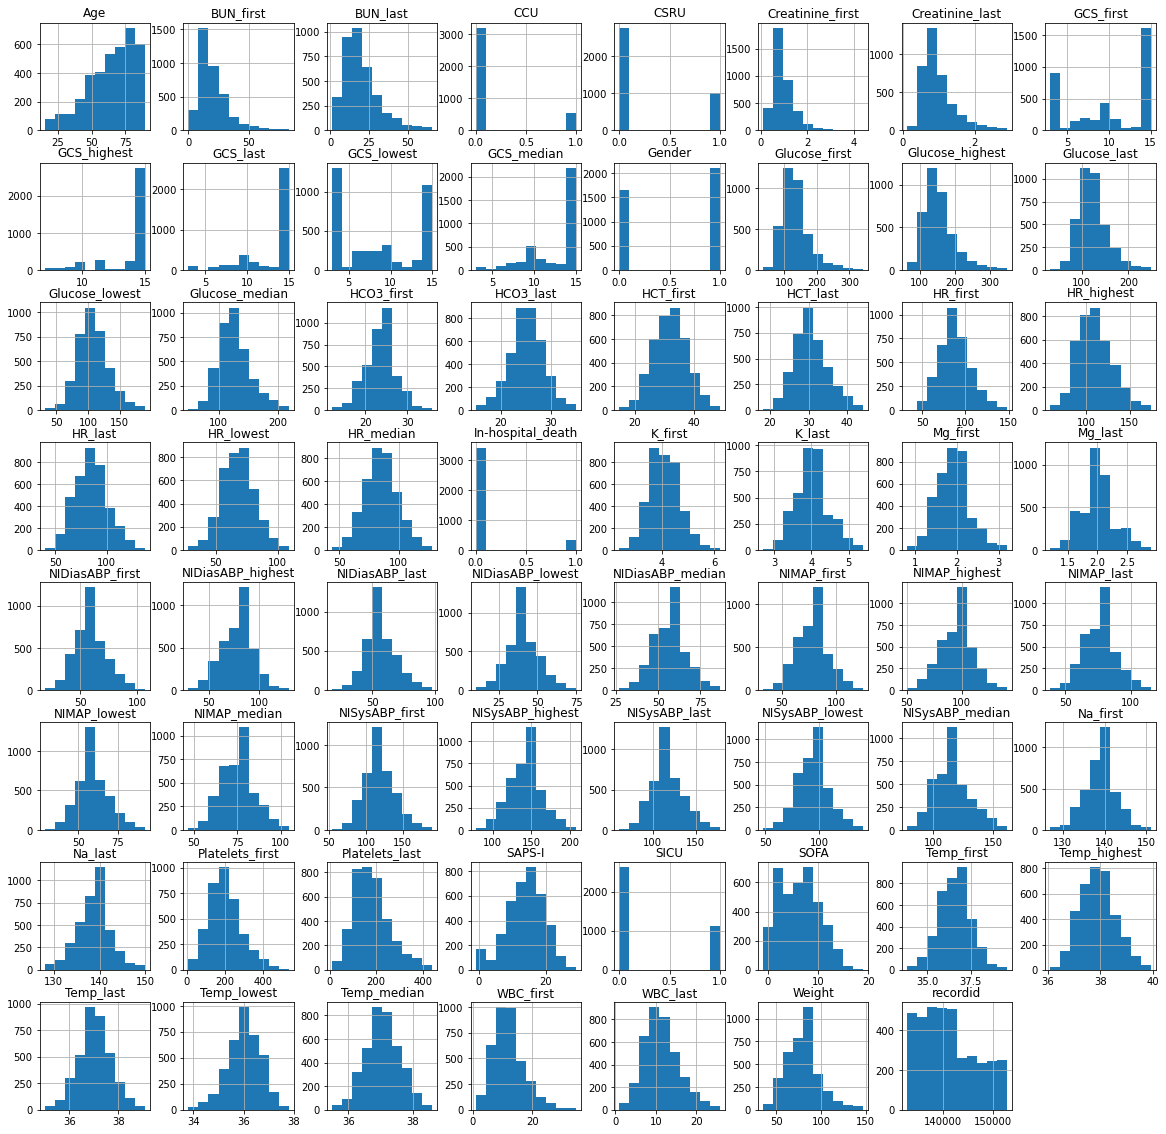

In [15]:
#I check the histograms after removing outliers
df.hist(figsize = (20,20))

# Separation Train/Test

In [16]:
X = df.drop(labels = 'In-hospital_death', axis = 'columns')
y = df['In-hospital_death']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y, 
                                                    random_state= 123)
print(X_train.shape, X_test.shape)


(2627, 62) (1126, 62)


# Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model_naivebayes = GaussianNB()

model_naivebayes.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_test: ", f1_score(y_test, y_pred))

f1_test:  0.35474006116207957


# Classification Tree

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
hyperp_search(classifier,parameters)


model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

f1_train: 0.211682 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[10000] }


hyperp_search(classifier,parameters)

model_logistic = LogisticRegression(C=1, max_iter=1000)

f1_train: 0.225079 using {'C': 0.1, 'max_iter': 10000}
f1_test:  0.23076923076923078


# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(37)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
   # print(confusion_matrix(y_test, y_pred))
     #print(classification_report(y_test, y_pred))

hyperp_search(classifier,parameters)

model_knn = KNeighborsClassifier(n_neighbors=37)

f1_train: 0.065716 using {'n_neighbors': 1}
f1_test:  0.14035087719298245


# Multilayer Perceptron classifier

In [45]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(10, 2),
              activation='relu', alpha=0.01, batch_size='auto',              
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, solver='lbfgs', tol=0.01,
              validation_fraction=0.2, verbose=True)
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [20000], "alpha": [0.001,0.01,0.1]}


In [46]:
#training the model
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# define gridsearch
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  12 out of  18 | elapsed:    3.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    3.7s remaining:    1.3s
[Parallel(n_jobs=-1)

In [50]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.0


# ROC curve

AUC: 0.52


C:\Users\a515-51g-52gk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.81
AUC: 0.80
AUC: 0.68


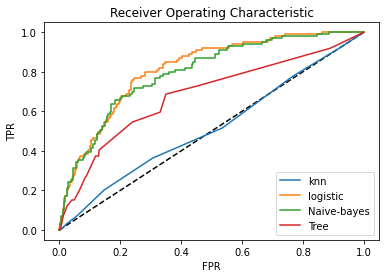

In [62]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
#    plt.plot(fpr, tpr, label='ROC')
#    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#    plt.xlabel('False Positive Rate')
#    plt.ylabel('True Positive Rate')
#    plt.title('Receiver Operating Characteristic (ROC) Curve')
#    plt.legend()
#    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train, y_train,X_test,y_test)
fpr2,tpr2=roc(model_logistic,X_train, y_train,X_test,y_test)
fpr3,tpr3=roc(model_naivebayes,X_train, y_train,X_test,y_test)
fpr4,tpr4=roc(model_tree,X_train, y_train,X_test,y_test)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "knn")
plt.plot(fpr2, tpr2, label= "logistic")
plt.plot(fpr3, tpr3, label= "Naive-bayes")
plt.plot(fpr4, tpr4, label= "Tree")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()